# Time series analyses

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import periodogram
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss 
from datetime import date 
import holidays
import importlib
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Monterrey = pd.read_csv("Files/Datos_22_24_CENTRO_limpios.csv", parse_dates=[0], index_col = "date")
daily_Monterrey = Monterrey.resample('D').mean()

In [2]:
# Directorio de archivos
import sys
sys.path.append("functions")

import Feature_Engineering
import EDA

### Feature Engineering

In [3]:
from Feature_Engineering import add_holiday_feature
from Feature_Engineering import add_weekend_feature
from Feature_Engineering import add_cyclic_feature

### Exploratory time series analysis

In [4]:
from EDA import graficar_serie_tiempo
from EDA import Periodograma
from EDA import Top_10_Periodogram
from EDA import heat
from EDA import prueba_adf
from EDA import prueba_kpss

## Feature Engineering

### Holidays

In [5]:
daily_Monterrey, festivos_df = add_holiday_feature(daily_Monterrey, 2022, 2024, country='Mexico')
display(festivos_df)

Fecha                                   Evento
0  2024-01-01                                Año Nuevo
1  2024-02-05                   Día de la Constitución
2  2024-03-18               Natalicio de Benito Juárez
3  2024-05-01                          Día del Trabajo
4  2024-09-16                  Día de la Independencia
5  2024-11-18                     Día de la Revolución
6  2024-10-01  Transmisión del Poder Ejecutivo Federal
7  2024-12-25                                  Navidad
8  2022-01-01                                Año Nuevo
9  2022-02-07                   Día de la Constitución
10 2022-03-21               Natalicio de Benito Juárez
11 2022-05-01                          Día del Trabajo
12 2022-09-16                  Día de la Independencia
13 2022-11-21                     Día de la Revolución
14 2022-12-25                                  Navidad
15 2023-01-01                                Año Nuevo
16 2023-02-06                   Día de la Constitución
17 2023-03-20               Natalicio de Benito Juárez
18 2023-05-01                          Día del Trabajo
19 2023-09-16                  Día de la Independencia
20 2023-11-20                     Día de la Revolución
21 2023-12-25                                  Navidad

### Weekends

In [6]:
# Crear la variable dummy para fines de semana
daily_Monterrey = add_weekend_feature(daily_Monterrey)

In [7]:
daily_Monterrey.head()

CO         NO       NO2        NOX         O3       PM10  \
date                                                                         
2022-01-01  1.532500   5.152917  18.90250  24.255833  25.416667  68.583333   
2022-01-02  1.230000   3.760833  12.31250  16.241667  26.654167  84.875000   
2022-01-03  1.197500   5.137500  12.60000  17.987500  31.666667  41.916667   
2022-01-04  1.743333  20.233333  37.88750  58.308333  18.375000  76.000000   
2022-01-05  1.656250  15.480000  36.30375  51.986667  25.095833  88.120833   

                PM2.5         PRS  RAINF         RH       SO2        SR  \
date                                                                      
2022-01-01  29.173750  705.870833    0.0  24.791667  4.329167  0.146958   
2022-01-02  11.750000  716.475000    0.0  25.083333  5.183333  0.144375   
2022-01-03   7.232083  720.066667    0.0  24.958333  3.546250  0.145375   
2022-01-04  30.655417  714.470833    0.0  30.416667  5.975000  0.139417   
2022-01-05  27.819458  710.172083    0.0  24.270833  7.105000  0.149083   

                 TOUT       WSR         WDR  is_holiday  is_weekend  
date                                                                 
2022-01-01  26.112917  5.733333  185.291667           1           1  
2022-01-02  14.480417  9.766667   80.166667           0           1  
2022-01-03   9.794583  9.208333   77.500000           0           0  
2022-01-04  12.896667  4.737500  171.333333           0           0  
2022-01-05  19.871875  6.280000  167.629167           0           0

## PM 10

### Correlation dependent variables with independent ones

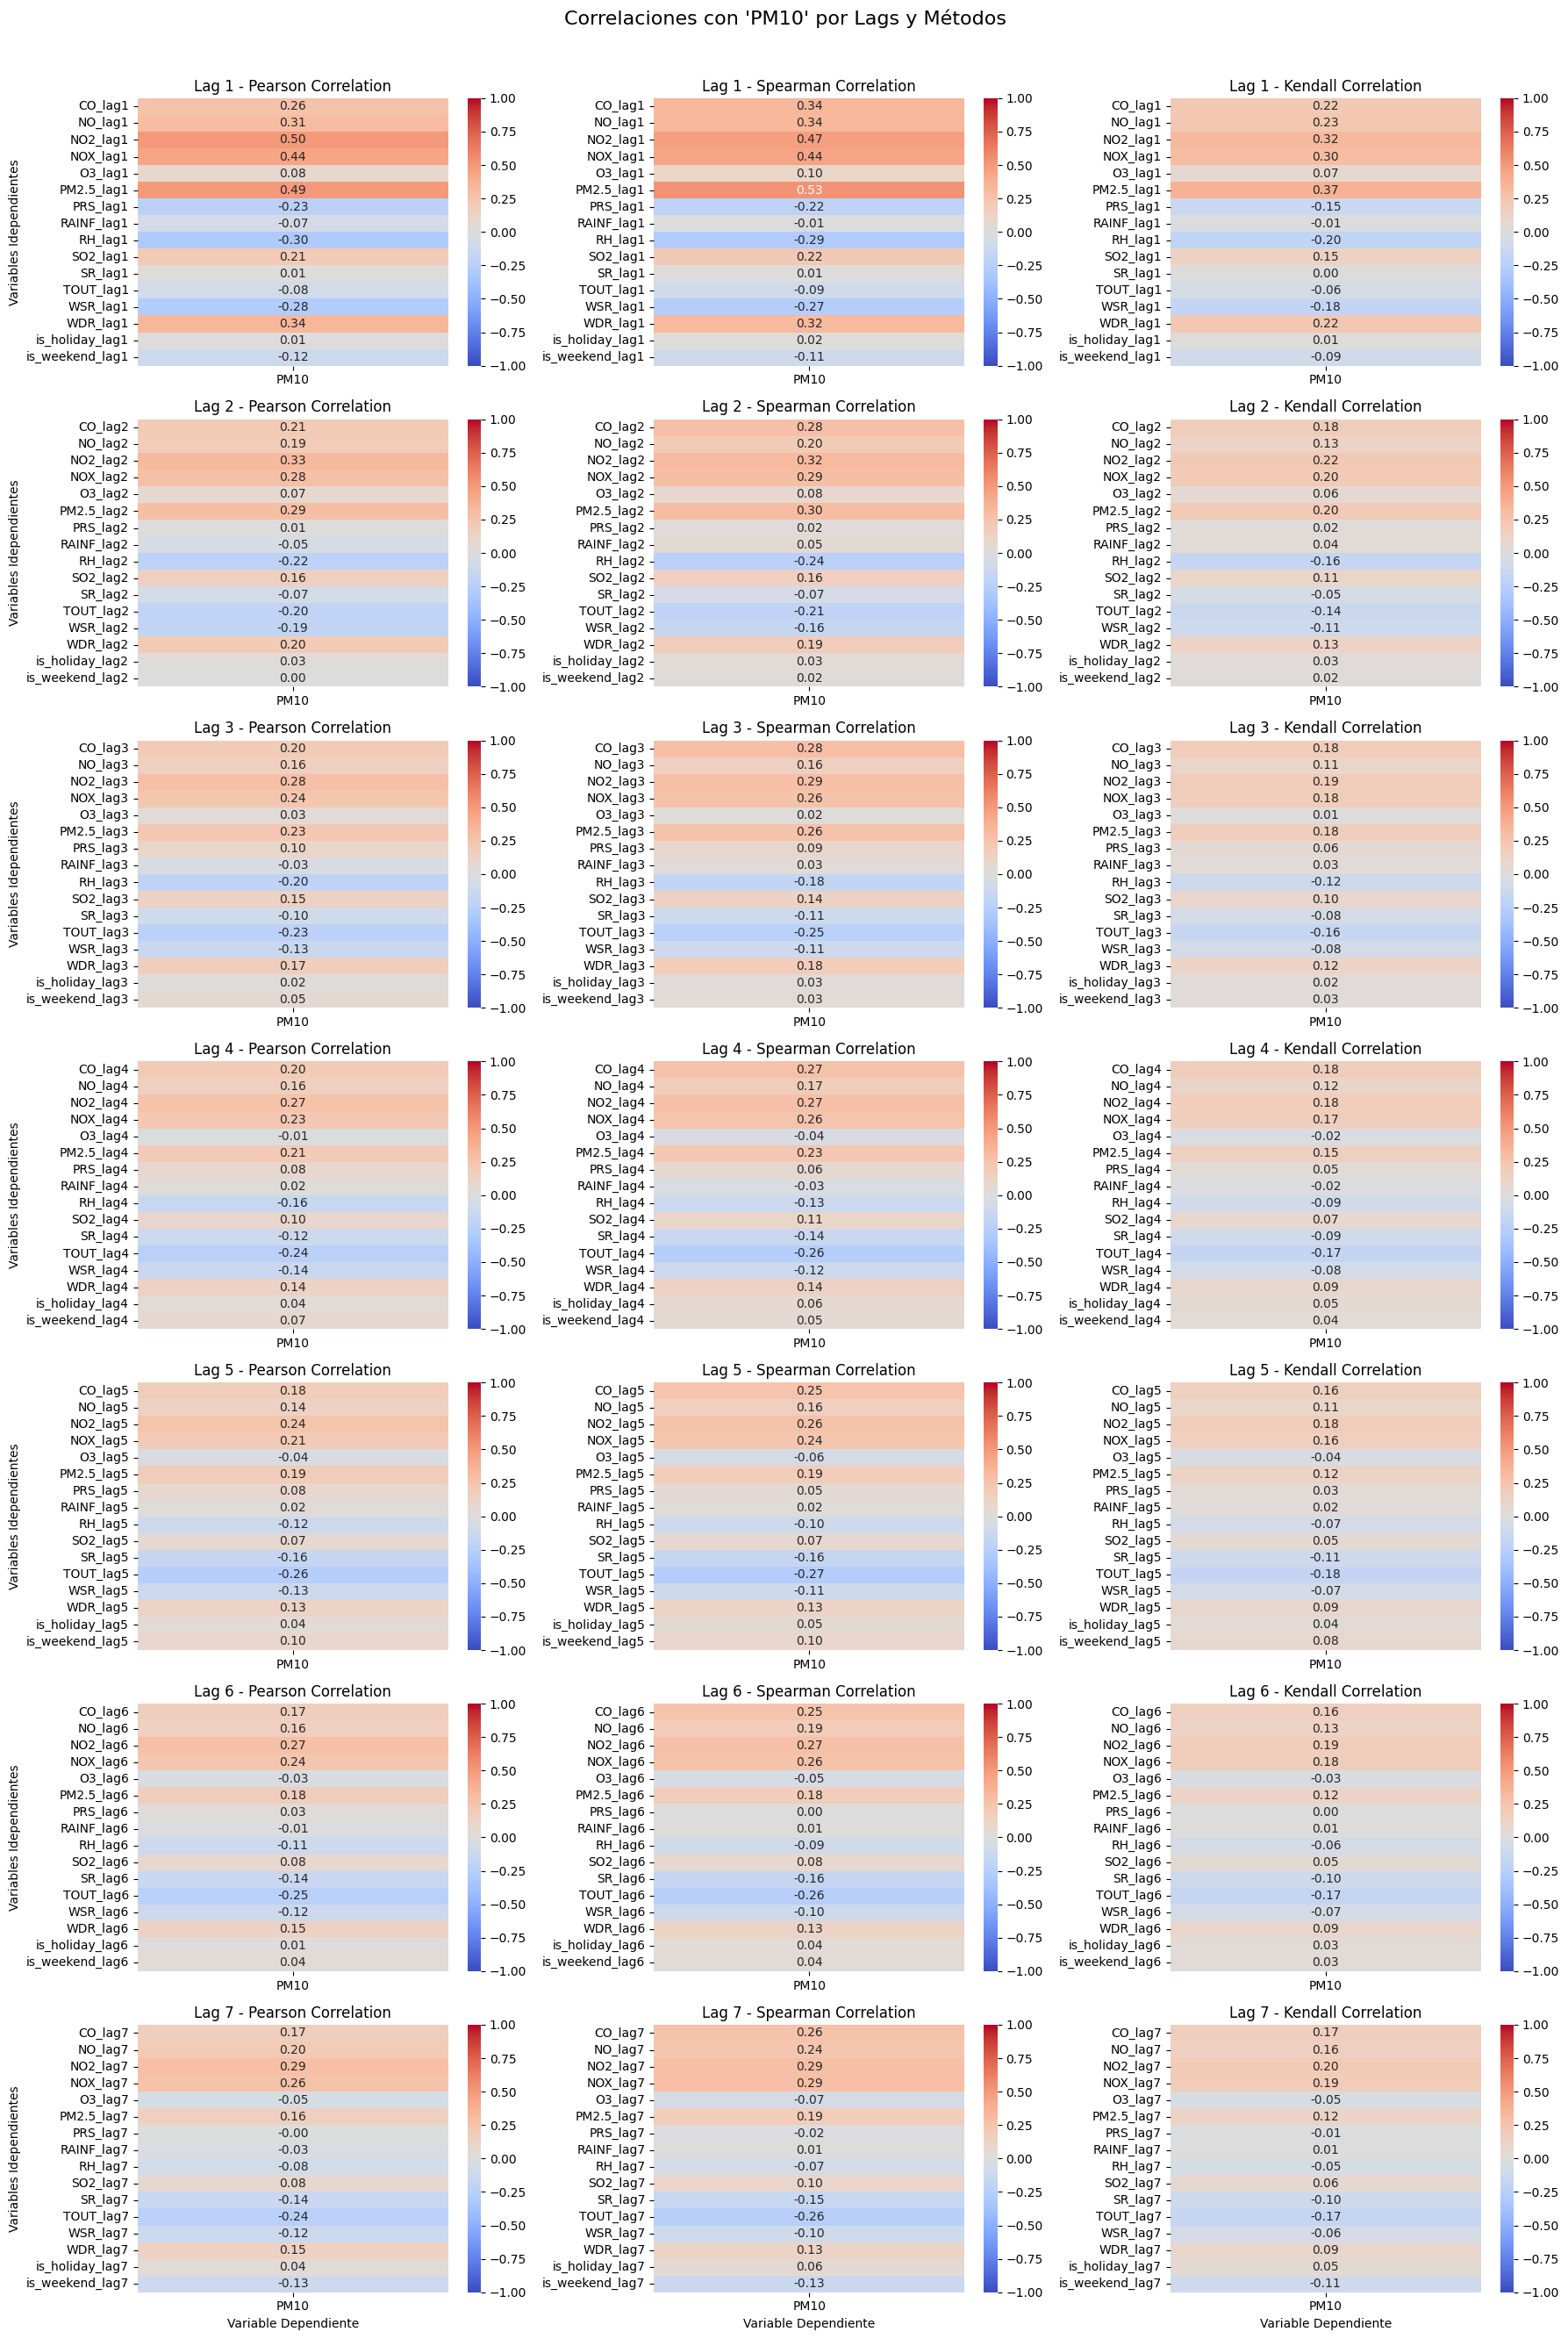

In [8]:
heat(daily_Monterrey, "PM10", 7)

### Stationarity test

In [9]:
prueba_adf(daily_Monterrey["PM10"])

-- ADF a nivel --
Estadístico ADF: -7.239542273265946
Valor p: 1.900198380711834e-10
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -7.240204381014418
Valor p: 4.0174323672875075e-09
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [10]:
prueba_kpss(daily_Monterrey["PM10"])

-- KPSS a nivel --
Estadístico KPSS: 0.18351252280507896
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.175597591980159
Valor p: 0.025335340016534154
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


### identify Seasonality

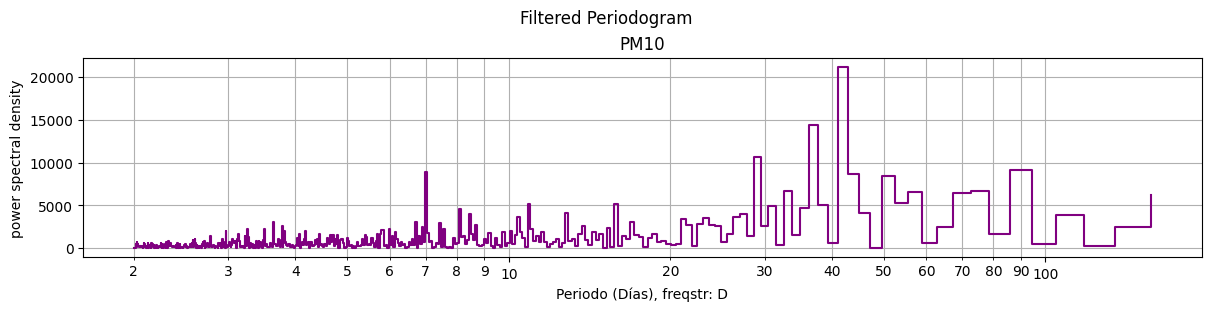

In [11]:
list_periods_spectra = Periodograma(daily_Monterrey["PM10"], detrend="constant")

In [12]:
Top_10_Periodogram(daily_Monterrey, "PM10", list_periods_spectra)


Top 10 para la variable 'PM10':


top_periods   top_spectra
0    41.000000  21156.229784
1    36.269231  14425.607741
2    28.575758  10683.705775
3    85.727273   9099.050482
4     6.985185   8863.291258
5    42.863636   8679.481771
6    49.631579   8474.386426
7    32.517241   6703.226933
8    72.538462   6671.700546
9    55.470588   6550.979177

### Generate features to capture seasonality

In [13]:
daily_Monterrey_pm10 = add_cyclic_feature(daily_Monterrey, "2022-01-03", 41, column_name="is_41_day_cycle")

### Plot everything generated and variable to predict

In [14]:
graficar_serie_tiempo(daily_Monterrey_pm10, "PM10", ["is_holiday", "is_weekend", "is_41_day_cycle"])

## SO2

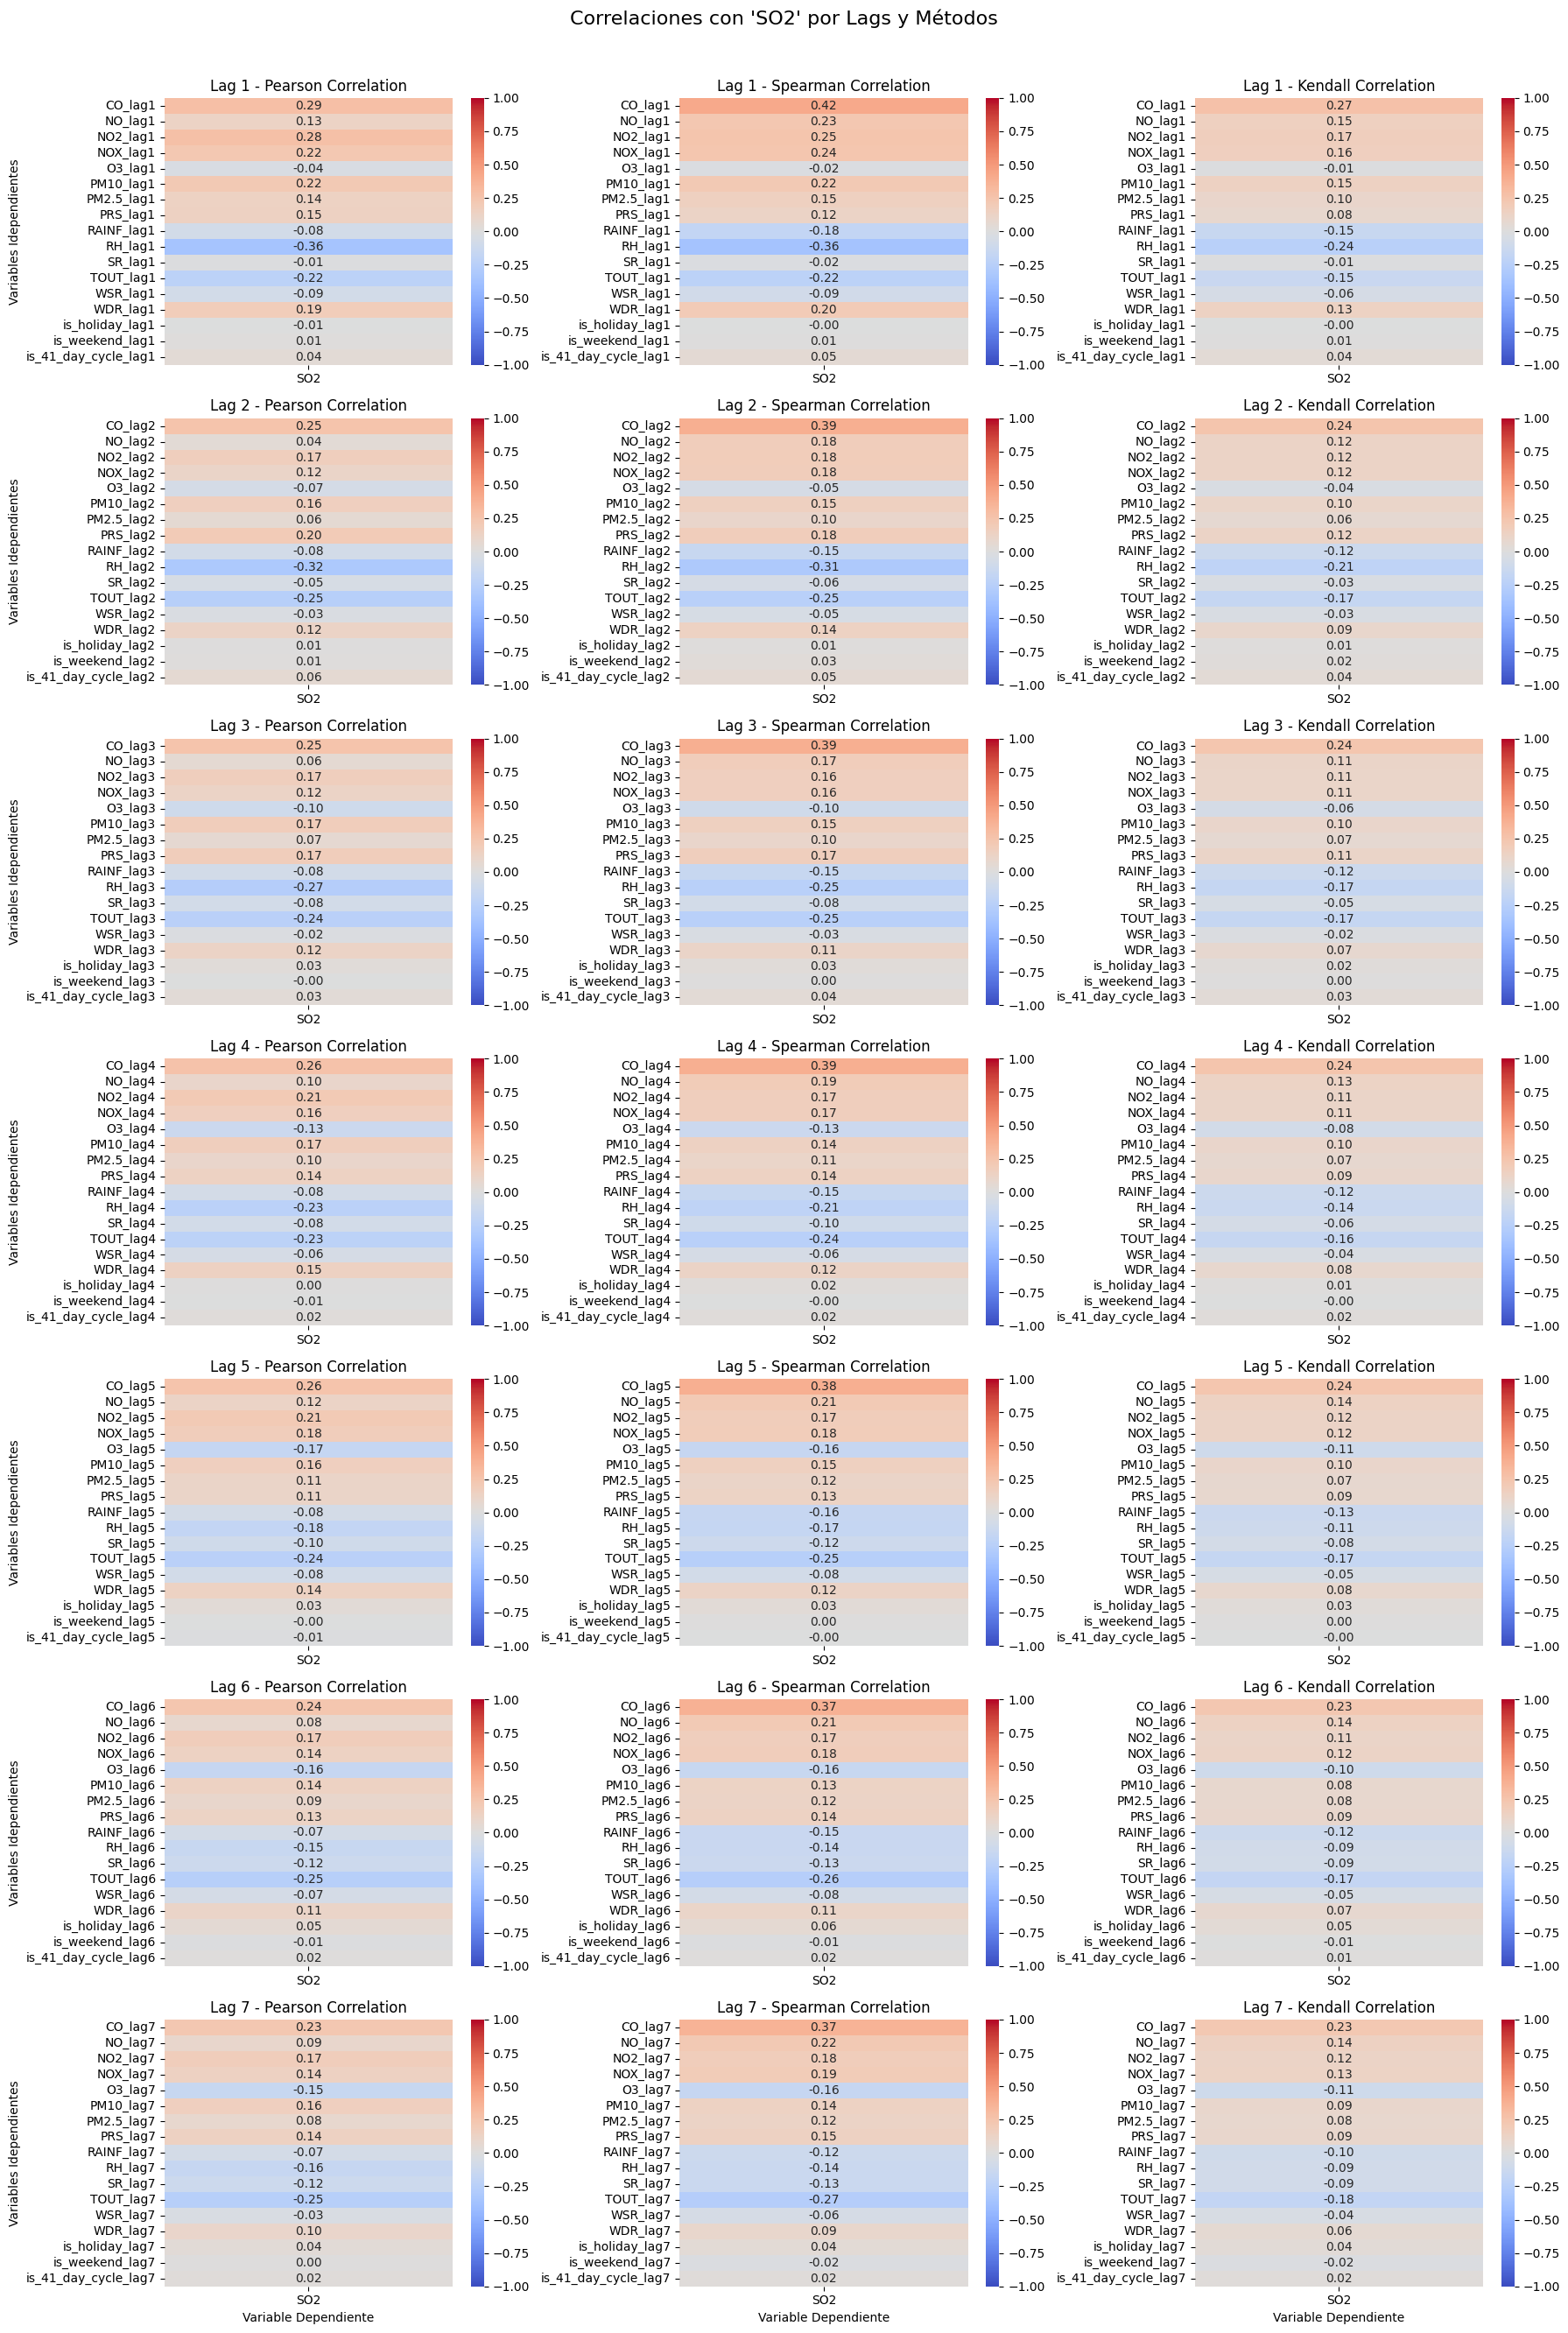

In [15]:
heat(daily_Monterrey, "SO2", 7)

### Stationarity tests

In [16]:
prueba_adf(daily_Monterrey["SO2"])

-- ADF a nivel --
Estadístico ADF: -3.03801878672463
Valor p: 0.03149325454972868
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -4.174503920442471
Valor p: 0.004890428494057712
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [17]:
prueba_kpss(daily_Monterrey["SO2"])

-- KPSS a nivel --
Estadístico KPSS: 2.6318555018046457
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.40711668882762997
Valor p: 0.01
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


### Identifying Seasonality

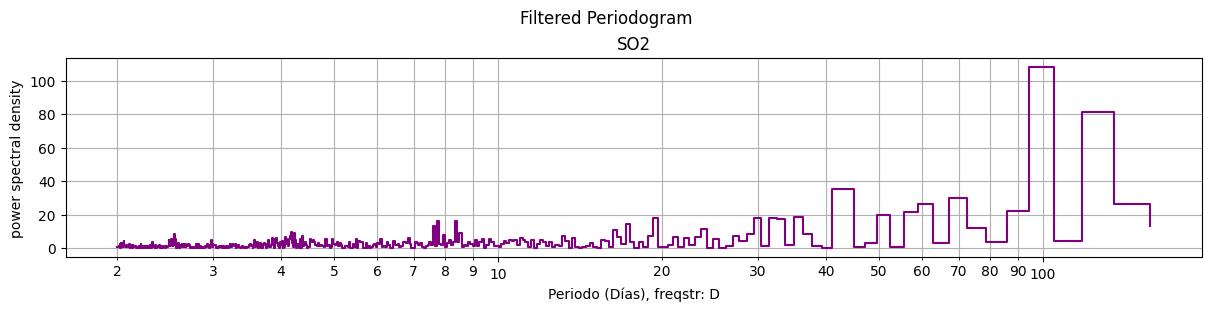

In [18]:
list_periods_spectra_SO2 = Periodograma(daily_Monterrey["SO2"], detrend="constant")

In [19]:
Top_10_Periodogram(daily_Monterrey, "SO2", list_periods_spectra_SO2)


Top 10 para la variable 'SO2':


top_periods  top_spectra
0    94.300000   108.026249
1   117.875000    81.083608
2    41.000000    35.218477
3    42.863636    35.055297
4    67.357143    29.984864
5    58.937500    26.457220
6   134.714286    26.369338
7    85.727273    21.982238
8    55.470588    21.756932
9    49.631579    19.722847

### Generate features to capture seasonality

In [20]:
daily_Monterrey_SO2 = add_cyclic_feature(daily_Monterrey, "2022-01-01", 94, column_name = "is_94_day_cycle")

### Plot

In [21]:
graficar_serie_tiempo(daily_Monterrey_SO2, "SO2", ["is_holiday", "is_weekend", "is_94_day_cycle"])

## CO

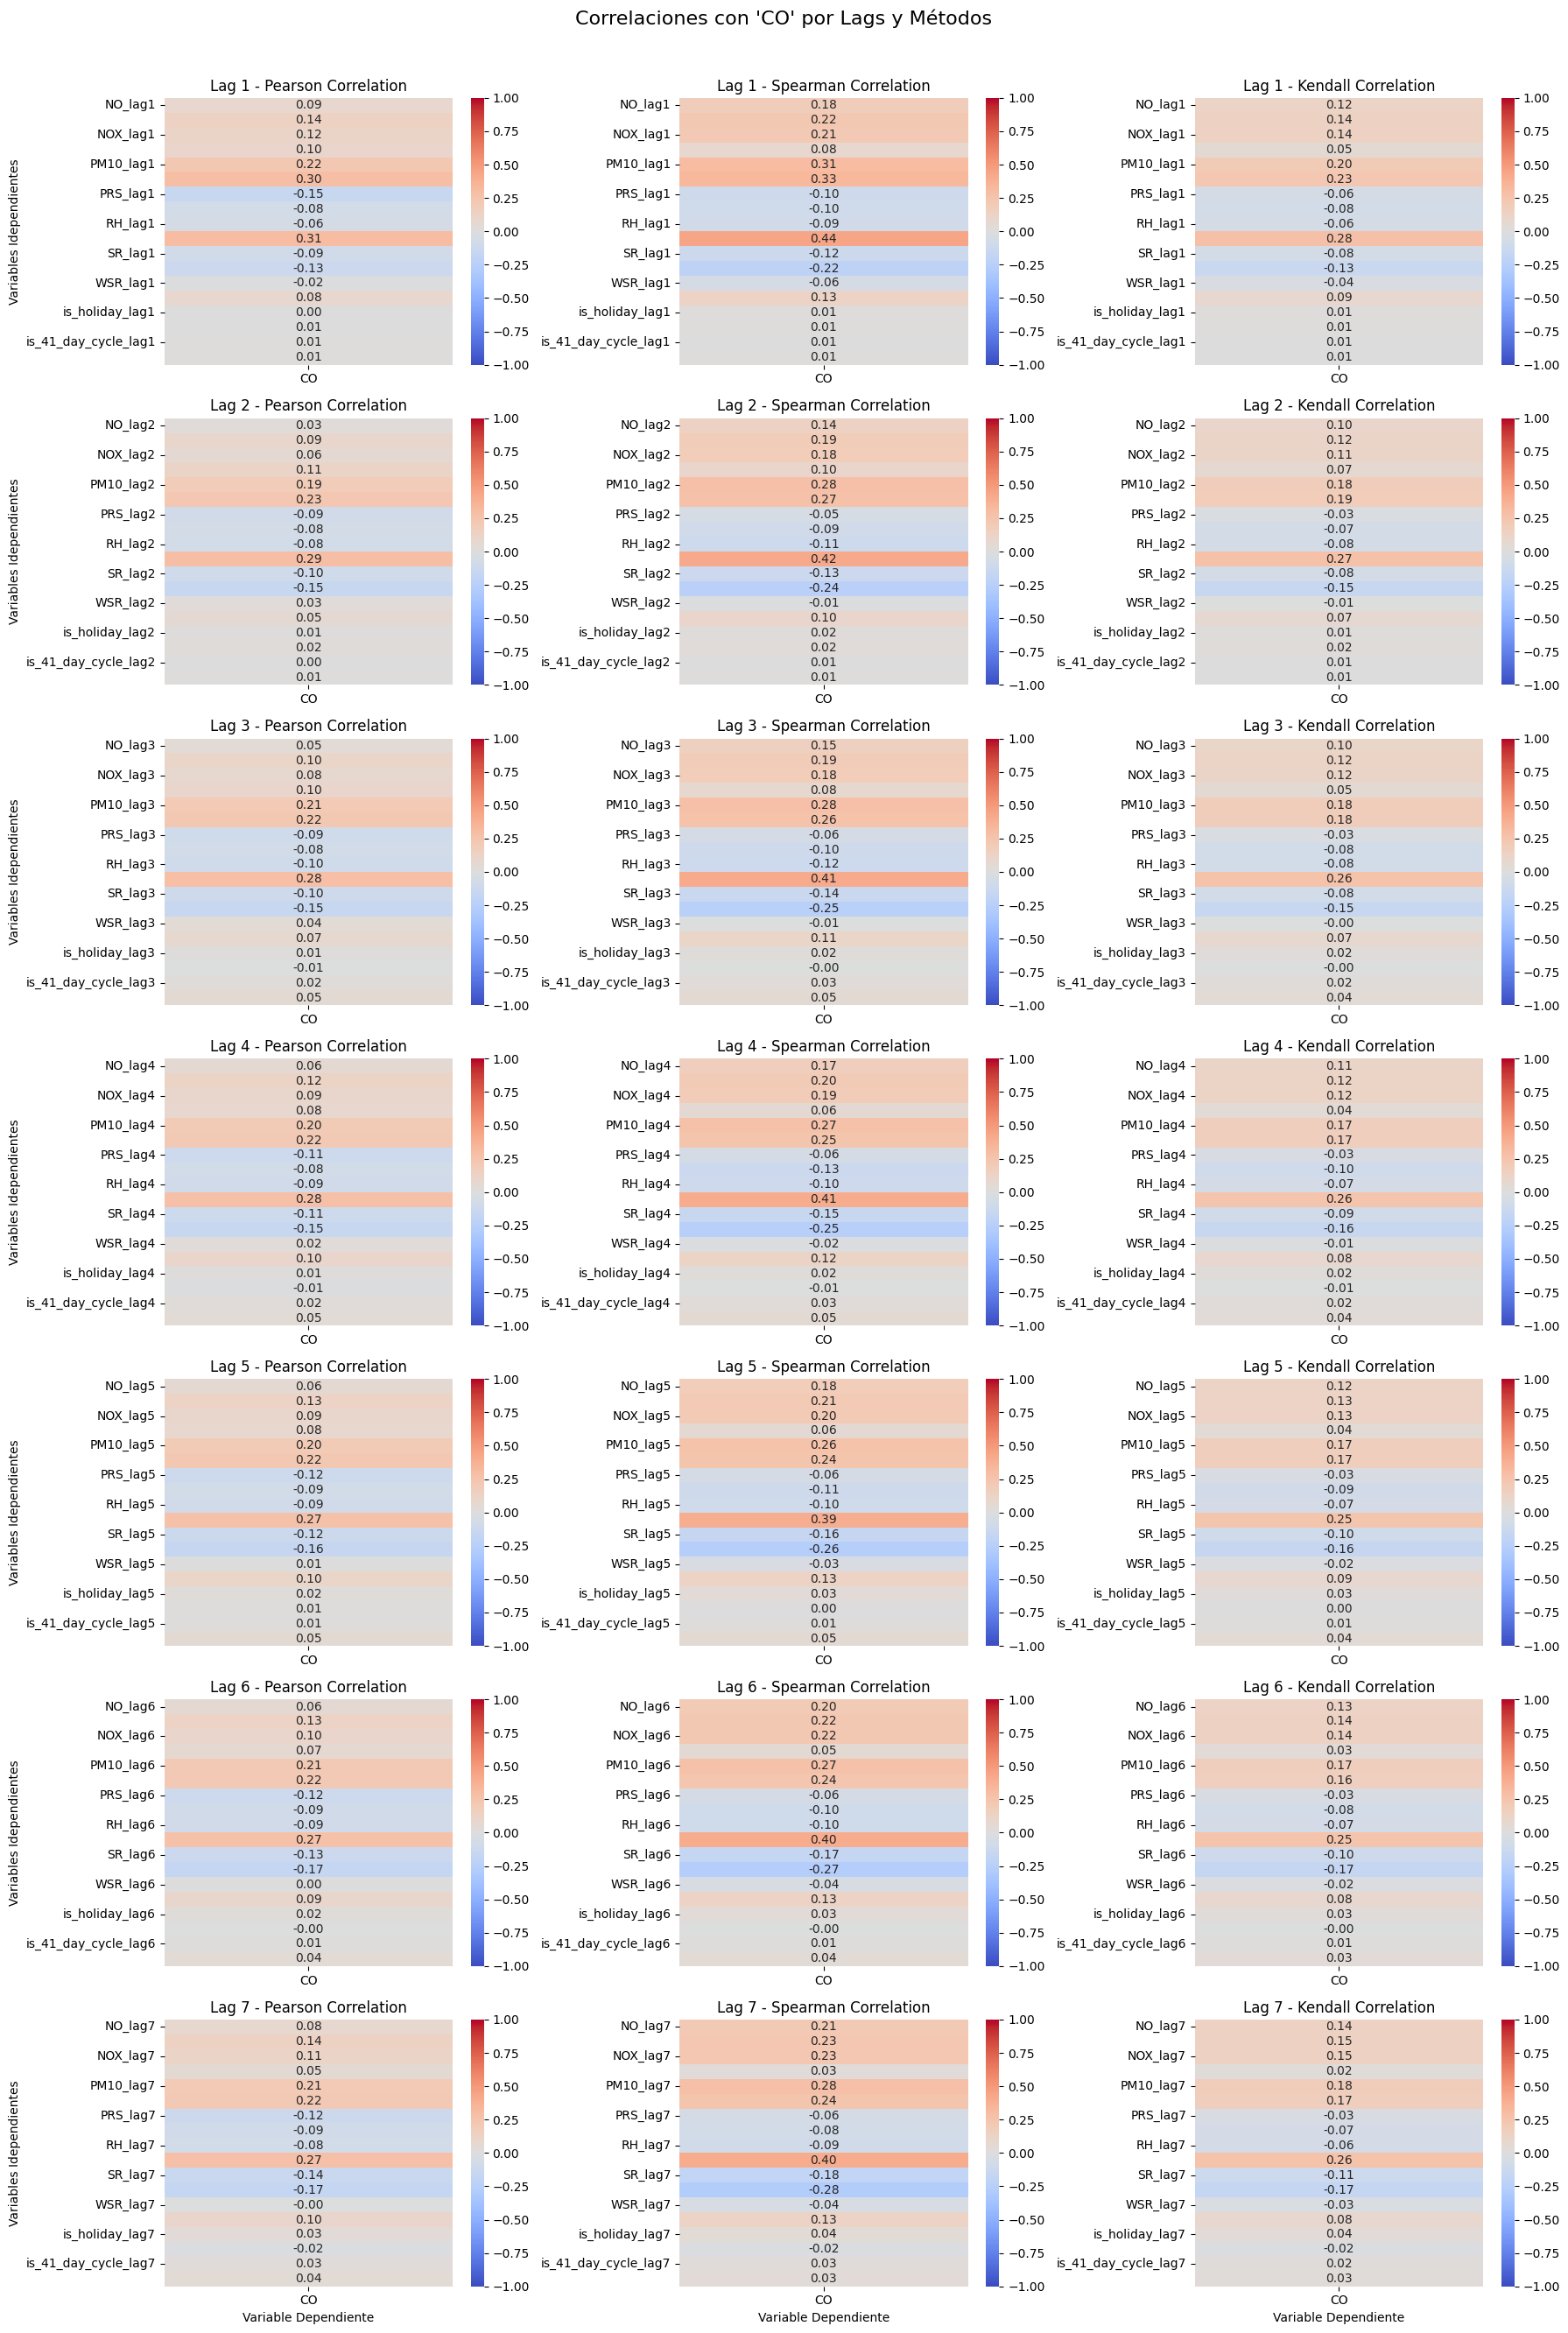

In [22]:
#Monterrey_CO = daily_Monterrey[["CO", "PRS", "RAINF", "RH", "SO2", "SR", "TOUT", "WSR", "WDR"]]
heat(daily_Monterrey, "CO", 7)

### Stationarity tests

In [23]:
prueba_adf(daily_Monterrey["CO"])

-- ADF a nivel --
Estadístico ADF: -3.9149686621232918
Valor p: 0.0019274064374655909
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -4.006724495359953
Valor p: 0.008602135546341563
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [24]:
prueba_kpss(daily_Monterrey["CO"])

-- KPSS a nivel --
Estadístico KPSS: 0.2681001257422357
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.16442248487821498
Valor p: 0.03464792926815417
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


### Identifying seasonality

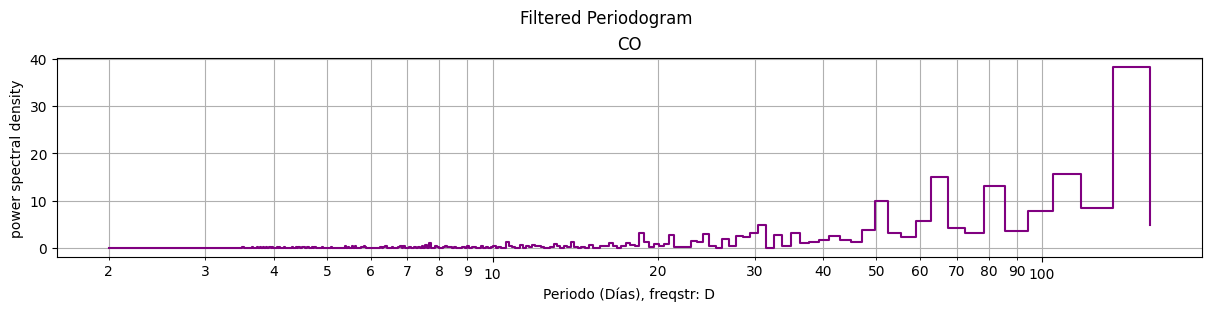

In [25]:
list_periods_spectra_CO = Periodograma(daily_Monterrey["CO"], detrend="constant")

In [26]:
Top_10_Periodogram(daily_Monterrey, "CO", list_periods_spectra_CO)


Top 10 para la variable 'CO':


top_periods  top_spectra
0   134.714286    38.218300
1   104.777778    15.680751
2    62.866667    15.035539
3    78.583333    13.111846
4    49.631579     9.932241
5   117.875000     8.559382
6    94.300000     7.754997
7    58.937500     5.746341
8    30.419355     4.962410
9   157.166667     4.927717

### Features to Capture Seasonality

In [27]:
daily_Monterrey_CO = add_cyclic_feature(daily_Monterrey, "2022-01-01", 135, column_name="is_135_day_cycle")

### Plot

In [28]:
graficar_serie_tiempo(daily_Monterrey_CO, "CO", ["is_holiday", "is_weekend", "is_135_day_cycle"])

## NOX

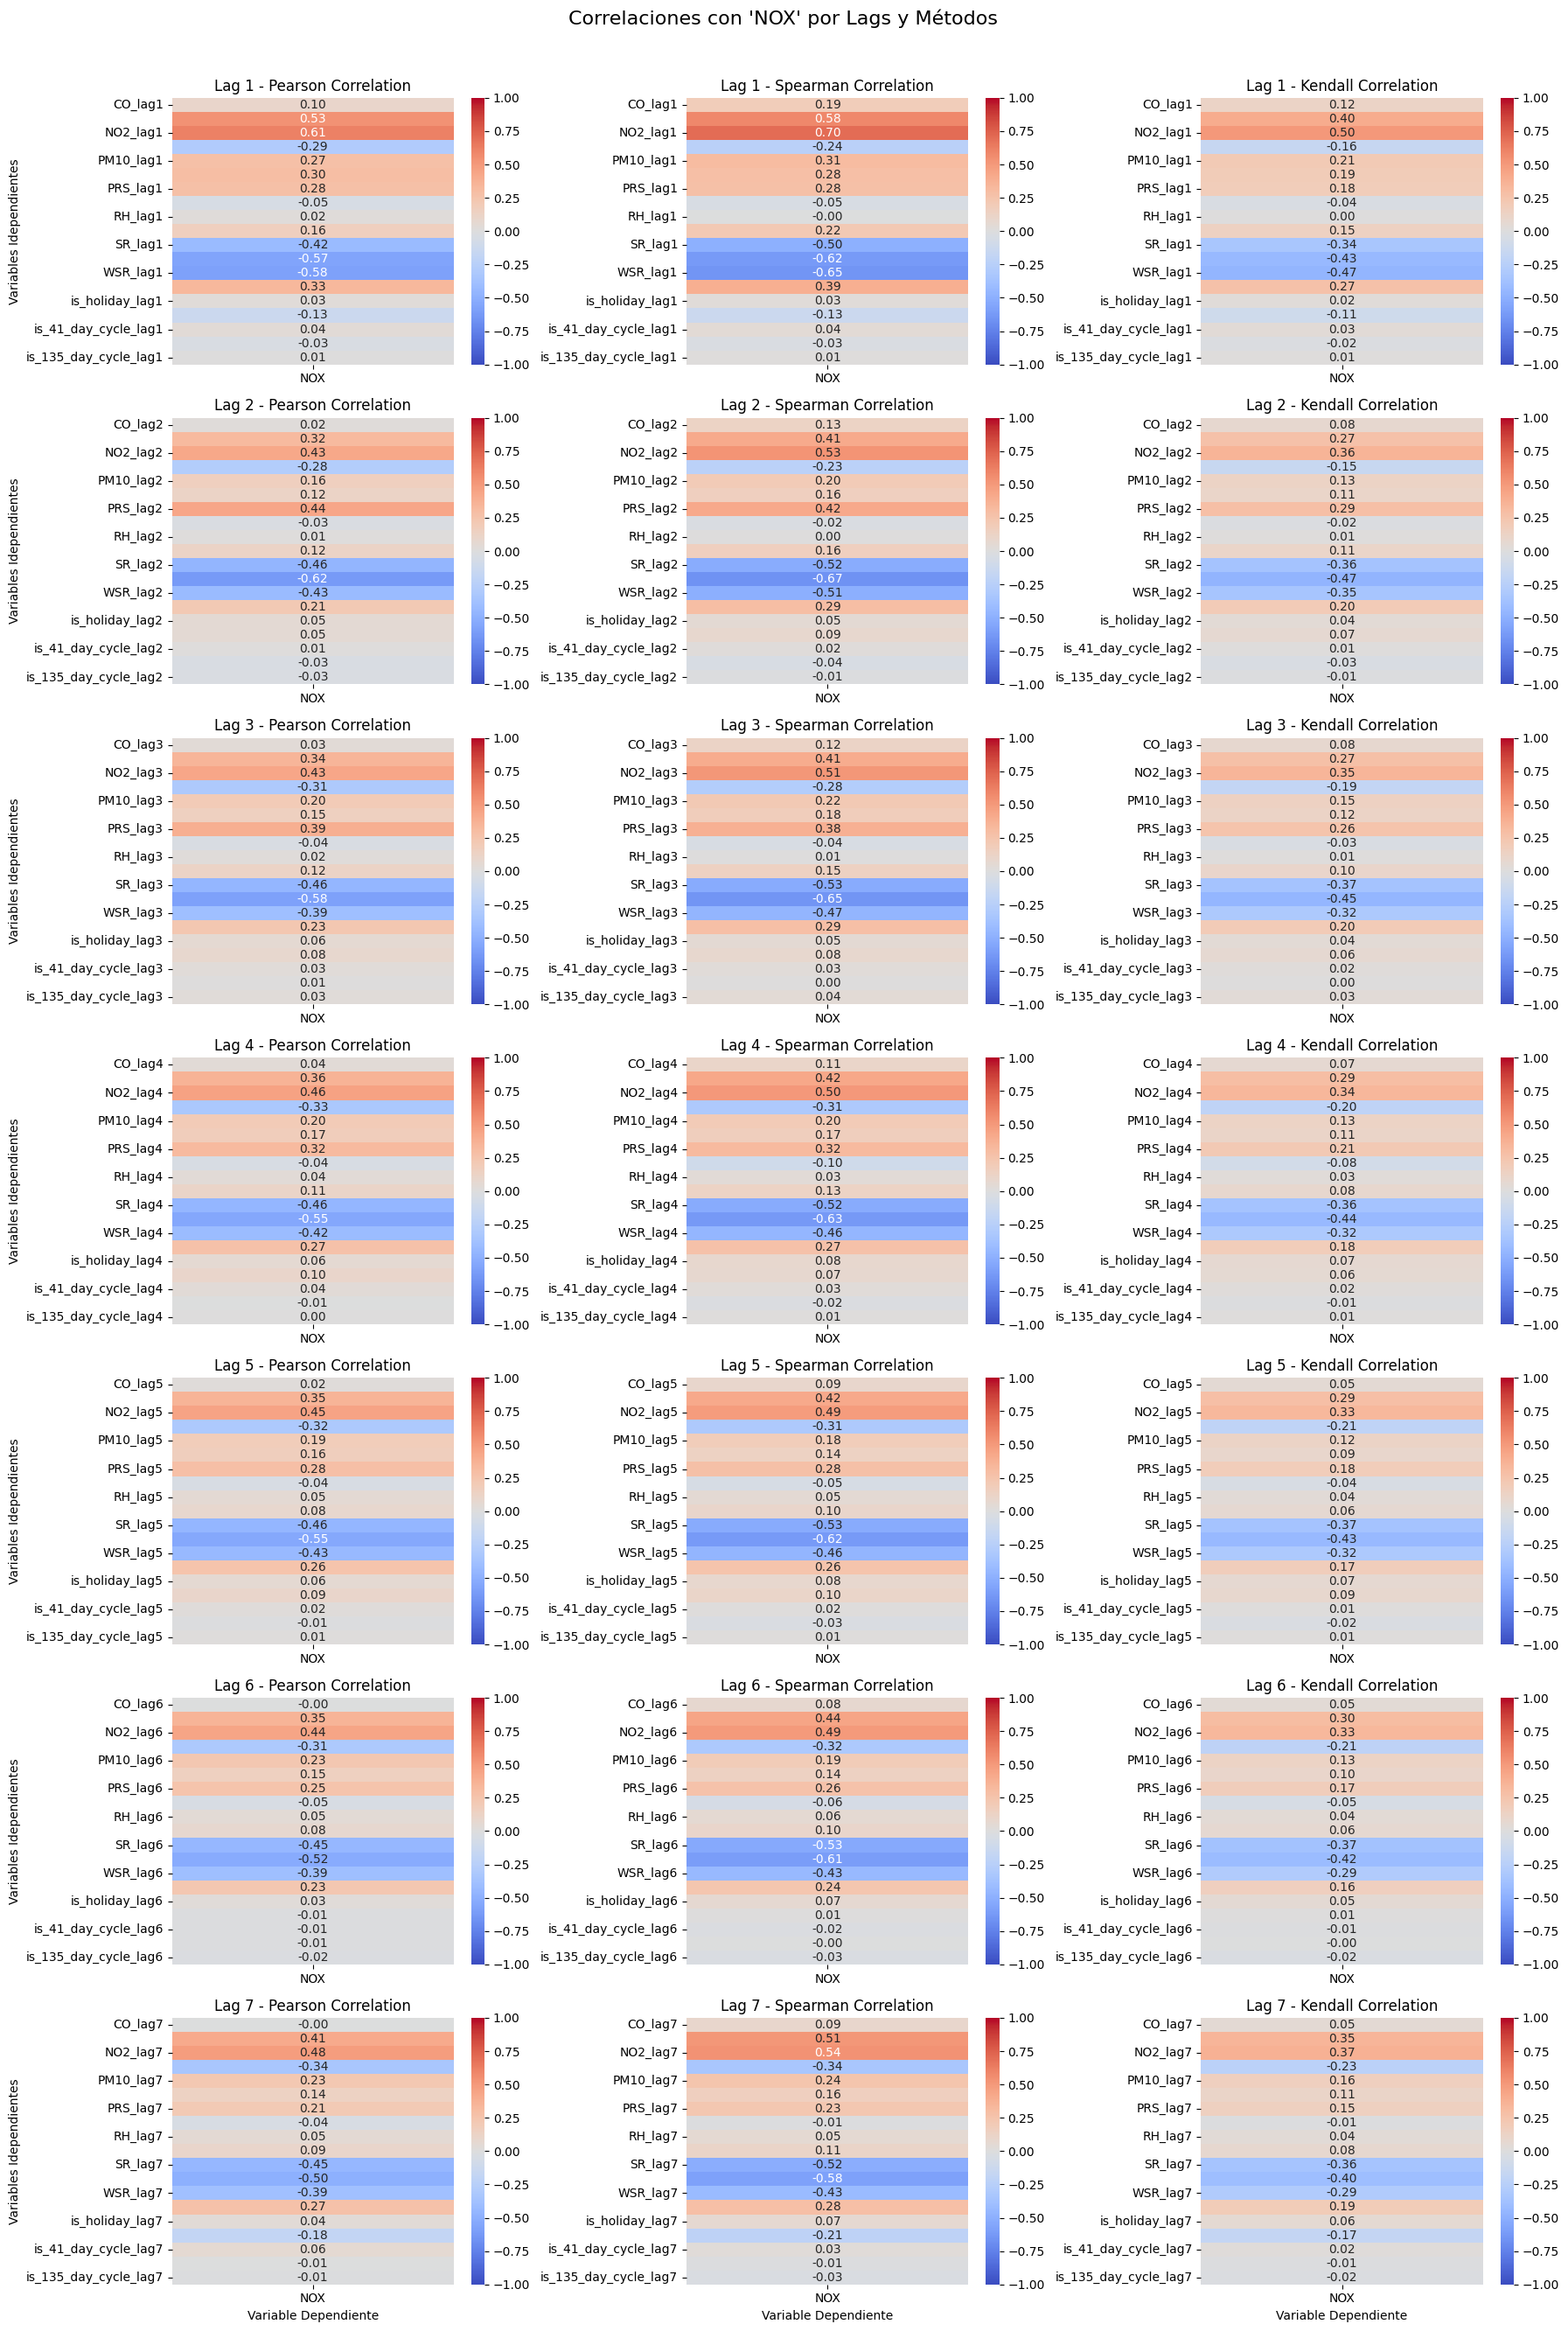

In [29]:
#Monterrey_NOX = daily_Monterrey[["NOX", "PRS", "RAINF", "RH", "SO2", "SR", "TOUT", "WSR", "WDR"]]
heat(daily_Monterrey, "NOX", 7)

### Stationarity tests

In [30]:
prueba_adf(daily_Monterrey["NOX"])

-- ADF a nivel --
Estadístico ADF: -3.7941096624380815
Valor p: 0.0029681590783901626
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -3.7830409030504506
Valor p: 0.01743899494920529
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [31]:
prueba_kpss(daily_Monterrey["NOX"])

-- KPSS a nivel --
Estadístico KPSS: 0.18419926381329912
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.19271560352308276
Valor p: 0.018731648678843964
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


### Identifying Seasonality

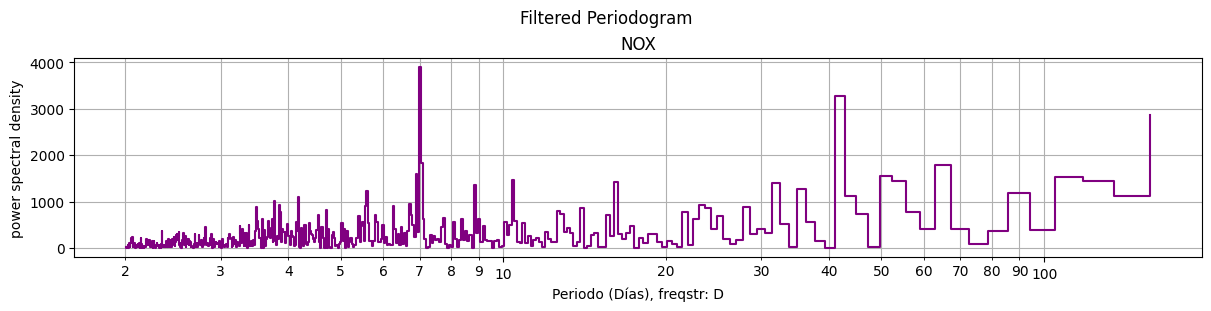

In [32]:
list_periods_spectra_NOX = Periodograma(daily_Monterrey["NOX"], detrend="constant")

In [33]:
Top_10_Periodogram(daily_Monterrey, "NOX", list_periods_spectra_NOX)


Top 10 para la variable 'NOX':


top_periods  top_spectra
0     6.985185  3901.774492
1    41.000000  3272.491774
2   157.166667  2877.853435
3     7.037313  1844.416155
4    62.866667  1789.083402
5     6.883212  1601.602401
6    49.631579  1546.164108
7   104.777778  1530.087589
8    10.362637  1477.331478
9    52.388889  1444.243559

### Features to Capture Seasonality

In [34]:
daily_Monterrey_NOX = add_cyclic_feature(daily_Monterrey, "2022-01-01", 7, column_name="is_7_day_cycle")

### Plot

In [35]:
graficar_serie_tiempo(daily_Monterrey_NOX, "NOX", ["is_holiday", "is_weekend", "is_7_day_cycle"])

## Plot decomposition time series

In [36]:
def plot_decomposition(variable, model = "additive", period = 4):
    seasonal_decomposition = seasonal_decompose(variable, model = model, period = period)
    fig = seasonal_decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.show()
    return

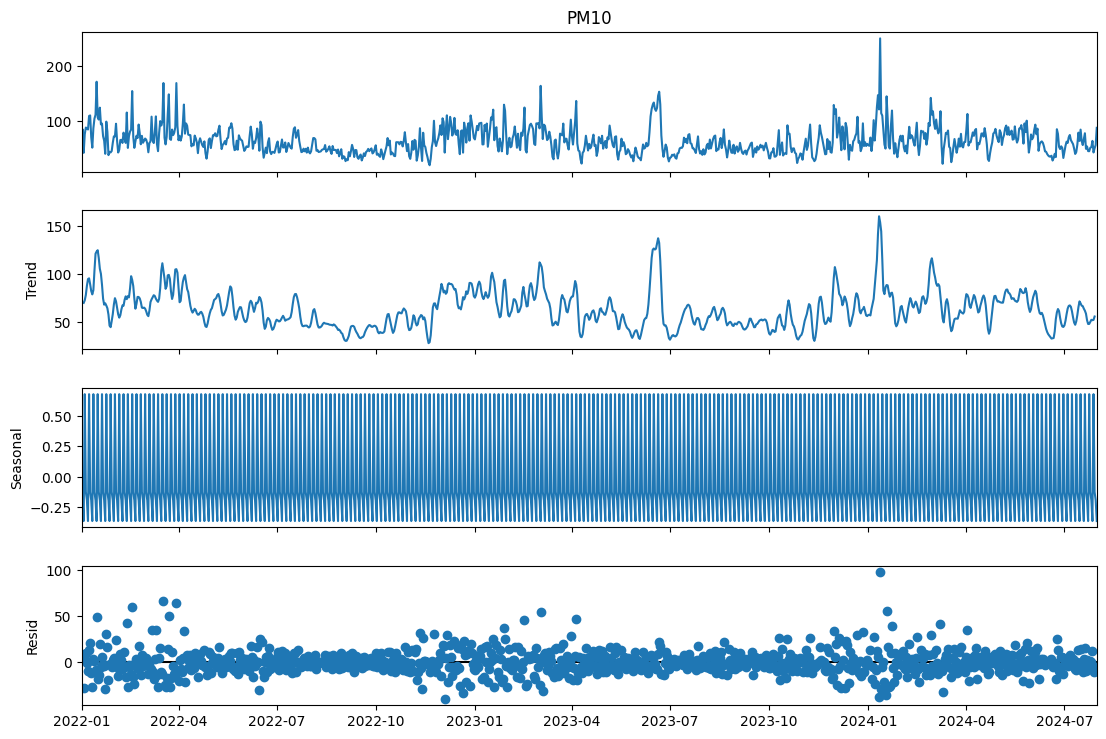

In [37]:
plot_decomposition(daily_Monterrey["PM10"])

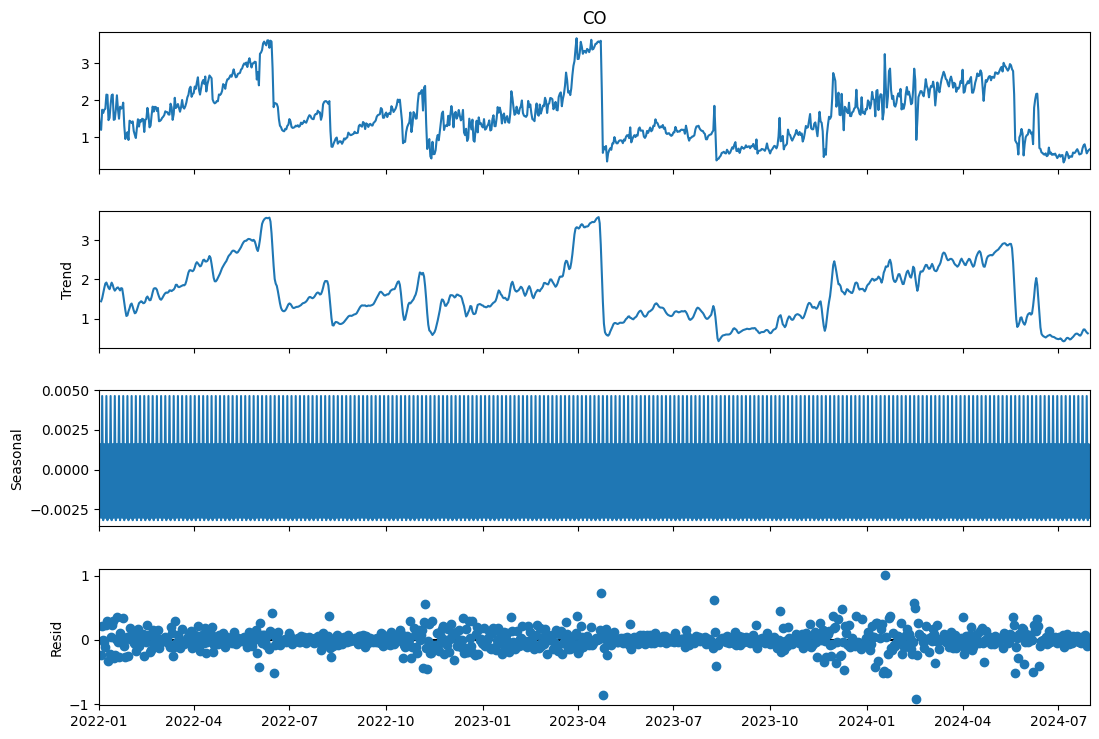

In [38]:
plot_decomposition(daily_Monterrey["CO"])

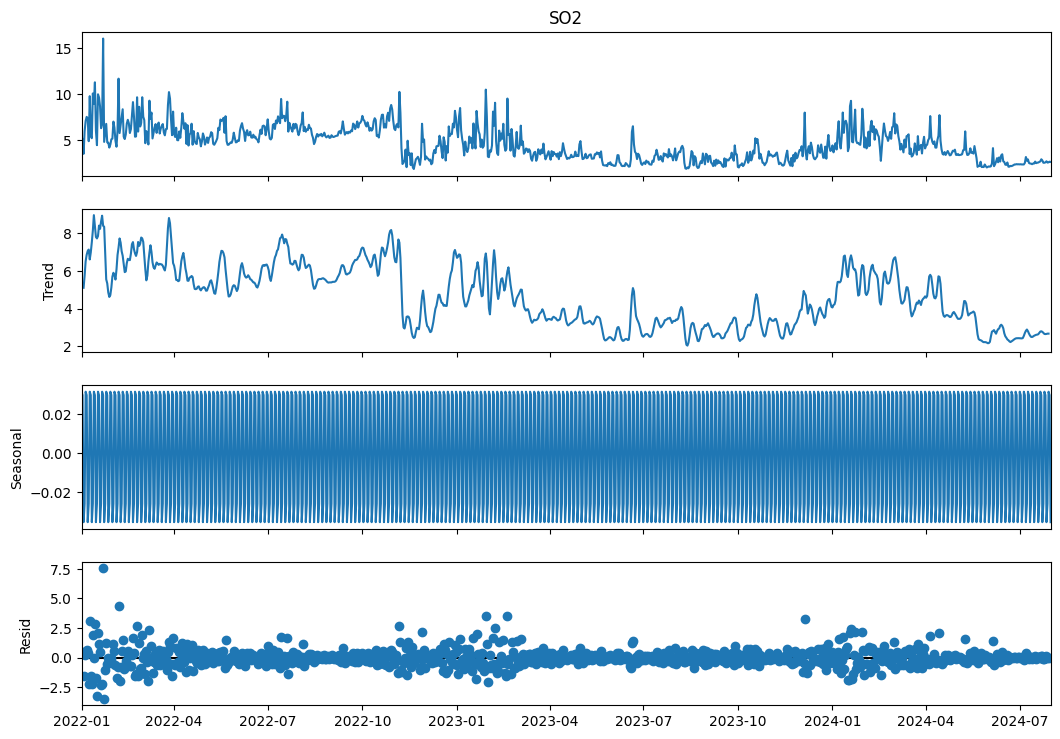

In [39]:
plot_decomposition(daily_Monterrey["SO2"])

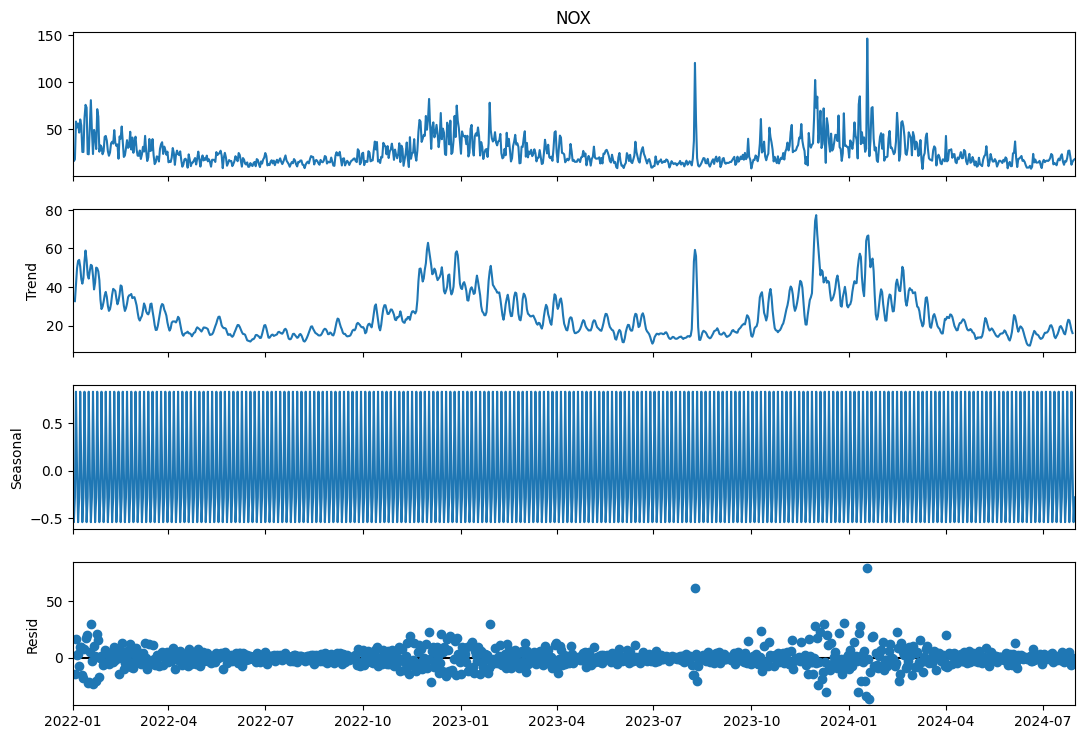

In [40]:
plot_decomposition(daily_Monterrey["NOX"])